### Import Needed Lib's

In [2]:
library(ggplot2)

### Cleaning the Data 
Methods based off of book

In [22]:
txt = readLines("offline.final.trace.txt")


In [23]:
head(txt)

[1] "# timestamp=2006-02-11 08:31:58"                                                                                                                                                                                                                                                                                                                                                                                                                                 
[2] "# usec=250"                                                                                                                                                                                                                                                                                                                                                                                                                                                      
[3] "# minReadings=110"                                                                                                                                                                                                                                                                                                                                                                                                                                               
[4] "t=1139643118358;id=00:02:2D:21:0F:33;pos=0.0,0.0,0.0;degree=0.0;00:14:bf:b1:97:8a=-38,2437000000,3;00:14:bf:b1:97:90=-56,2427000000,3;00:0f:a3:39:e1:c0=-53,2462000000,3;00:14:bf:b1:97:8d=-65,2442000000,3;00:14:bf:b1:97:81=-65,2422000000,3;00:14:bf:3b:c7:c6=-66,2432000000,3;00:0f:a3:39:dd:cd=-75,2412000000,3;00:0f:a3:39:e0:4b=-78,2462000000,3;00:0f:a3:39:e2:10=-87,2437000000,3;02:64:fb:68:52:e6=-88,2447000000,1;02:00:42:55:31:00=-84,2457000000,1"
[5] "t=1139643118744;id=00:02:2D:21:0F:33;pos=0.0,0.0,0.0;degree=0.0;00:14:bf:b1:97:8a=-38,2437000000,3;00:0f:a3:39:e1:c0=-54,2462000000,3;00:14:bf:b1:97:90=-56,2427000000,3;00:14:bf:3b:c7:c6=-67,2432000000,3;00:14:bf:b1:97:81=-66,2422000000,3;00:14:bf:b1:97:8d=-70,2442000000,3;00:0f:a3:39:e0:4b=-79,2462000000,3;00:0f:a3:39:dd:cd=-73,2412000000,3;00:0f:a3:39:e2:10=-83,2437000000,3;02:00:42:55:31:00=-85,2457000000,1"                                   
[6] "t=1139643119002;id=00:02:2D:21:0F:33;pos=0.0,0.0,0.0;degree=0.0;00:14:bf:b1:97:8a=-38,2437000000,3;00:0f:a3:39:e1:c0=-54,2462000000,3;00:14:bf:b1:97:90=-57,2427000000,3;00:14:bf:b1:97:81=-66,2422000000,3;00:14:bf:3b:c7:c6=-69,2432000000,3;00:14:bf:b1:97:8d=-70,2442000000,3;00:0f:a3:39:e0:4b=-78,2462000000,3;00:0f:a3:39:e2:10=-83,2437000000,3;00:0f:a3:39:dd:cd=-65,2412000000,3;02:64:fb:68:52:e6=-90,2447000000,1"

Use the substr() function to locate lines/strings that begin with a ‘#’ character and tally them

In [24]:
sum(substr(txt, 1, 1) == "#")

[1] 5312

In [25]:
length(txt)

[1] 151392

split based on ;

In [26]:
strsplit(txt[4], ";")[[1]]

[1] "t=1139643118358"                    "id=00:02:2D:21:0F:33"              
 [3] "pos=0.0,0.0,0.0"                    "degree=0.0"                        
 [5] "00:14:bf:b1:97:8a=-38,2437000000,3" "00:14:bf:b1:97:90=-56,2427000000,3"
 [7] "00:0f:a3:39:e1:c0=-53,2462000000,3" "00:14:bf:b1:97:8d=-65,2442000000,3"
 [9] "00:14:bf:b1:97:81=-65,2422000000,3" "00:14:bf:3b:c7:c6=-66,2432000000,3"
[11] "00:0f:a3:39:dd:cd=-75,2412000000,3" "00:0f:a3:39:e0:4b=-78,2462000000,3"
[13] "00:0f:a3:39:e2:10=-87,2437000000,3" "02:64:fb:68:52:e6=-88,2447000000,1"
[15] "02:00:42:55:31:00=-84,2457000000,1"

strings can be split further using an equals sign delimiter

In [27]:
unlist(lapply(strsplit(txt[4], ";")[[1]],
              function(x)
                  sapply(strsplit(x, "=")[[1]], strsplit, ",")))

t       1139643118358                  id   00:02:2D:21:0F:33 
                "t"     "1139643118358"                "id" "00:02:2D:21:0F:33" 
                pos        0.0,0.0,0.01        0.0,0.0,0.02        0.0,0.0,0.03 
              "pos"               "0.0"               "0.0"               "0.0" 
             degree                 0.0   00:14:bf:b1:97:8a   -38,2437000000,31 
           "degree"               "0.0" "00:14:bf:b1:97:8a"               "-38" 
  -38,2437000000,32   -38,2437000000,33   00:14:bf:b1:97:90   -56,2427000000,31 
       "2437000000"                 "3" "00:14:bf:b1:97:90"               "-56" 
  -56,2427000000,32   -56,2427000000,33   00:0f:a3:39:e1:c0   -53,2462000000,31 
       "2427000000"                 "3" "00:0f:a3:39:e1:c0"               "-53" 
  -53,2462000000,32   -53,2462000000,33   00:14:bf:b1:97:8d   -65,2442000000,31 
       "2462000000"                 "3" "00:14:bf:b1:97:8d"               "-65" 
  -65,2442000000,32   -65,2442000000,33   00:14:bf:b1:97:81   -65,2422000000,31 
       "2442000000"                 "3" "00:14:bf:b1:97:81"               "-65" 
  -65,2422000000,32   -65,2422000000,33   00:14:bf:3b:c7:c6   -66,2432000000,31 
       "2422000000"                 "3" "00:14:bf:3b:c7:c6"               "-66" 
  -66,2432000000,32   -66,2432000000,33   00:0f:a3:39:dd:cd   -75,2412000000,31 
       "2432000000"                 "3" "00:0f:a3:39:dd:cd"               "-75" 
  -75,2412000000,32   -75,2412000000,33   00:0f:a3:39:e0:4b   -78,2462000000,31 
       "2412000000"                 "3" "00:0f:a3:39:e0:4b"               "-78" 
  -78,2462000000,32   -78,2462000000,33   00:0f:a3:39:e2:10   -87,2437000000,31 
       "2462000000"                 "3" "00:0f:a3:39:e2:10"               "-87" 
  -87,2437000000,32   -87,2437000000,33   02:64:fb:68:52:e6   -88,2447000000,11 
       "2437000000"                 "3" "02:64:fb:68:52:e6"               "-88" 
  -88,2447000000,12   -88,2447000000,13   02:00:42:55:31:00   -84,2457000000,11 
       "2447000000"                 "1" "02:00:42:55:31:00"               "-84" 
  -84,2457000000,12   -84,2457000000,13 
       "2457000000"                 "1"

However, there is a more efficient way of doing this. We can split the data on each of the delimiters at once.

In [28]:
cleaning = strsplit(txt[4], "[;=,]")[[1]]
cleaning[1:10]

[1] "t"                 "1139643118358"     "id"               
 [4] "00:02:2D:21:0F:33" "pos"               "0.0"              
 [7] "0.0"               "0.0"               "degree"           
[10] "0.0"

Now, extract the first four variables as follows.

In [29]:
cleaning[c(2, 4, 6:8, 10)]

[1] "1139643118358"     "00:02:2D:21:0F:33" "0.0"              
[4] "0.0"               "0.0"               "0.0"

Strip the first four elements fo the array

In [30]:
cleaning[ - (1:10)]

[1] "00:14:bf:b1:97:8a" "-38"               "2437000000"       
 [4] "3"                 "00:14:bf:b1:97:90" "-56"              
 [7] "2427000000"        "3"                 "00:0f:a3:39:e1:c0"
[10] "-53"               "2462000000"        "3"                
[13] "00:14:bf:b1:97:8d" "-65"               "2442000000"       
[16] "3"                 "00:14:bf:b1:97:81" "-65"              
[19] "2422000000"        "3"                 "00:14:bf:3b:c7:c6"
[22] "-66"               "2432000000"        "3"                
[25] "00:0f:a3:39:dd:cd" "-75"               "2412000000"       
[28] "3"                 "00:0f:a3:39:e0:4b" "-78"              
[31] "2462000000"        "3"                 "00:0f:a3:39:e2:10"
[34] "-87"               "2437000000"        "3"                
[37] "02:64:fb:68:52:e6" "-88"               "2447000000"       
[40] "1"                 "02:00:42:55:31:00" "-84"              
[43] "2457000000"        "1"

To build out the additional rows that we need our data to only include one location per line. To do this we bind each of these sets of 4 values from the responding devices with the initial 4 values in the line.

In [31]:
cleaning_tmp = matrix(cleaning[ - (1:10) ], ncol = 4, byrow = TRUE)
cleaning_mat = cbind(matrix(cleaning[c(2, 4, 6:8, 10)], nrow = nrow(cleaning_tmp), ncol = 6, byrow = TRUE), cleaning_tmp)

In [32]:
dim(cleaning_mat)

[1] 11 10

Now, we iterate for each row of the txt file

In [33]:
## Function to parse the data
processLine = function(x) {
    # split x by the 3 delim's (;=,)
    cleaning = strsplit(x, "[;=,]")[[1]]
    
    # if the lenth of the field is equa to 10, then return NULL
    if (length(cleaning) == 10)
      return(NULL)
    # create a variable cleaning_temp = a matrix of with 4 columns 
    # then, cbind the matrix 
    cleaning_tmp = matrix(cleaning[ - (1:10)], ncol = 4, byrow = TRUE) 
    cbind(matrix(cleaning[c(2, 4, 6:8, 10)], nrow = nrow(cleaning_tmp), ncol = 6, byrow = TRUE), cleaning_tmp) 
}

In [34]:
## Test this function 
cleaning_tmp = lapply(txt[4:20], processLine)
sapply(cleaning_tmp, nrow)

[1] 11 10 10 11  9 10  9  9 10 11 11  9  9  9  8 10 14

combine all of these individual matrices into one dataframe. This can be done efficiently using the do.call() method

In [36]:
offline = as.data.frame(do.call("rbind", cleaning_tmp))
dim(offline)

[1] 170  10

We discard the lines starting with the comment character ‘#’ and then pass each remaining line to processLine().


In [57]:
lines = txt[ substr(txt, 1, 1) != "#" ]
cleaning_tmp = lapply(lines, processLine)
data = as.data.frame(do.call("rbind", cleaning_tmp), stringsAsFactors = FALSE)
dim(data)

[1] 1181628      10

In [56]:
head(data)

time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,type
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,3
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:90,-56,2427000000,3
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,3
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8d,-65,2442000000,3
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:81,-65,2422000000,3
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:3b:c7:c6,-66,2432000000,3


We need to create the columns

In [58]:
names(data) = c("time", "scanMac", "posX", "posY", "posZ", "orientation", "mac", "signal", "channel", "type")

In [59]:
head(data)

time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,type
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:90,-56,2427000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e1:c0,-53,2462000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8d,-65,2442000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:81,-65,2422000000,3
1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:3b:c7:c6,-66,2432000000,3


Convert the *position*, *signal*, and *time* variables from strings to numeric data types

In [60]:
numVars = c("time", "posX", "posY", "posZ", "orientation", "signal")
data[ numVars ] = lapply(data[ numVars ], as.numeric)

In [61]:
head(data)

time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,type
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,3
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:90,-56,2427000000,3
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,3
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8d,-65,2442000000,3
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:81,-65,2422000000,3
1.139643e+12,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:3b:c7:c6,-66,2432000000,3


Change the type of the device to something more comprehensible than the numbers 1 and 3. To do this, we can make it a factor with the levels, say, "adhoc" and "access point". Then, we drop all records for adhoc measurements and remove the type variable from our data frame.

In [62]:
data = data[ data$type == "3", ]
data = data[ , "type" != names(data) ]
dim(data)

[1] 978443      9

Over 100,000 records from our data frame. Now, we take a deeper look into the time variable. The time for this data set is measured in the number of milliseconds from midnight on January 1st, 1970. This is the origin used for the POSIXt format, but with POSIXt, it is the number of seconds, not milliseconds. We can scale the value of time to seconds and then simply set the class of the time element in order to have the values appear and operate as date-times.

In [63]:
data$rawTime = data$time
data$time = data$time/1000
class(data$time) = c("POSIXt", "POSIXct")

In [64]:
head(data)

time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,rawTime
2006-02-11 02:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,1.139643e+12
2006-02-11 02:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:90,-56,2427000000,1.139643e+12
2006-02-11 02:31:58,00:02:2D:21:0F:33,0,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,1.139643e+12
2006-02-11 02:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8d,-65,2442000000,1.139643e+12
2006-02-11 02:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:81,-65,2422000000,1.139643e+12
2006-02-11 02:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:3b:c7:c6,-66,2432000000,1.139643e+12


Check the types of the variables in the data frame

In [65]:
unlist(lapply(data, class))

time1       time2     scanMac        posX        posY        posZ 
   "POSIXt"   "POSIXct" "character"   "numeric"   "numeric"   "numeric" 
orientation         mac      signal     channel     rawTime 
  "numeric" "character"   "numeric" "character"   "numeric"

Next, we want to verify that the actual values of the data look reasonable.

In [66]:
summary(data[, numVars])

      time                          posX            posY             posZ  
 Min.   :2006-02-11 02:31:58   Min.   : 0.00   Min.   : 0.000   Min.   :0  
 1st Qu.:2006-02-11 08:21:27   1st Qu.: 2.00   1st Qu.: 3.000   1st Qu.:0  
 Median :2006-02-11 14:57:58   Median :12.00   Median : 6.000   Median :0  
 Mean   :2006-02-16 09:57:37   Mean   :13.52   Mean   : 5.897   Mean   :0  
 3rd Qu.:2006-02-19 09:52:40   3rd Qu.:23.00   3rd Qu.: 8.000   3rd Qu.:0  
 Max.   :2006-03-09 15:41:10   Max.   :33.00   Max.   :13.000   Max.   :0  
  orientation        signal     
 Min.   :  0.0   Min.   :-99.0  
 1st Qu.: 90.0   1st Qu.:-69.0  
 Median :180.0   Median :-60.0  
 Mean   :167.2   Mean   :-61.7  
 3rd Qu.:270.0   3rd Qu.:-53.0  
 Max.   :359.9   Max.   :-25.0  

In [67]:
head(data)

time,scanMac,posX,posY,posZ,orientation,mac,signal,channel,rawTime
2006-02-11 02:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,1.139643e+12
2006-02-11 02:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:90,-56,2427000000,1.139643e+12
2006-02-11 02:31:58,00:02:2D:21:0F:33,0,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,1.139643e+12
2006-02-11 02:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:8d,-65,2442000000,1.139643e+12
2006-02-11 02:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:b1:97:81,-65,2422000000,1.139643e+12
2006-02-11 02:31:58,00:02:2D:21:0F:33,0,0,0,0,00:14:bf:3b:c7:c6,-66,2432000000,1.139643e+12


In [68]:
str(data)

'data.frame':	978443 obs. of  10 variables:
 $ time       : POSIXt, format: "2006-02-11 02:31:58" "2006-02-11 02:31:58" ...
 $ scanMac    : chr  "00:02:2D:21:0F:33" "00:02:2D:21:0F:33" "00:02:2D:21:0F:33" "00:02:2D:21:0F:33" ...
 $ posX       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ posY       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ posZ       : num  0 0 0 0 0 0 0 0 0 0 ...
 $ orientation: num  0 0 0 0 0 0 0 0 0 0 ...
 $ mac        : chr  "00:14:bf:b1:97:8a" "00:14:bf:b1:97:90" "00:0f:a3:39:e1:c0" "00:14:bf:b1:97:8d" ...
 $ signal     : num  -38 -56 -53 -65 -65 -66 -75 -78 -87 -38 ...
 $ channel    : chr  "2437000000" "2427000000" "2462000000" "2442000000" ...
 $ rawTime    : num  1.14e+12 1.14e+12 1.14e+12 1.14e+12 1.14e+12 ...


Lets take a deeper look into the character variables. To do this we convert them into factors.

In [69]:
summary(sapply(data[ , c("mac", "channel", "scanMac")], as.factor))

                mac               channel                    scanMac      
 00:0f:a3:39:e1:c0:145862   2462000000:189774   00:02:2D:21:0F:33:978443  
 00:0f:a3:39:dd:cd:145619   2437000000:152124                             
 00:14:bf:b1:97:8a:132962   2412000000:145619                             
 00:14:bf:3b:c7:c6:126529   2432000000:126529                             
 00:14:bf:b1:97:90:122315   2427000000:122315                             
 00:14:bf:b1:97:8d:121325   2442000000:121325                             
 (Other)          :183831   (Other)   :120757                             

Notice that there is only one value for *scanMac*. We will remove this from our data because there is only one value from which the MAC addresses were taken. We also notice that all the *posZ* values for the hand-held device are 0. This is because the measurements were taken on one floor. We will drop this value as well. 

In [70]:
data = data[ , !(names(data) %in% c("scanMac", "posZ"))]

In [71]:
head(data)

time,posX,posY,orientation,mac,signal,channel,rawTime
2006-02-11 02:31:58,0,0,0,00:14:bf:b1:97:8a,-38,2437000000,1.139643e+12
2006-02-11 02:31:58,0,0,0,00:14:bf:b1:97:90,-56,2427000000,1.139643e+12
2006-02-11 02:31:58,0,0,0,00:0f:a3:39:e1:c0,-53,2462000000,1.139643e+12
2006-02-11 02:31:58,0,0,0,00:14:bf:b1:97:8d,-65,2442000000,1.139643e+12
2006-02-11 02:31:58,0,0,0,00:14:bf:b1:97:81,-65,2422000000,1.139643e+12
2006-02-11 02:31:58,0,0,0,00:14:bf:3b:c7:c6,-66,2432000000,1.139643e+12


### Data Exploration

The documentation states that we should have only 8 values for orientation.

In [72]:
length(unique(data$orientation))

[1] 203

We can see that, right now, we have more. Let's dig deeper into the distribution of *orientation*. We will plot the empirical CDF of the *orientation* variable.

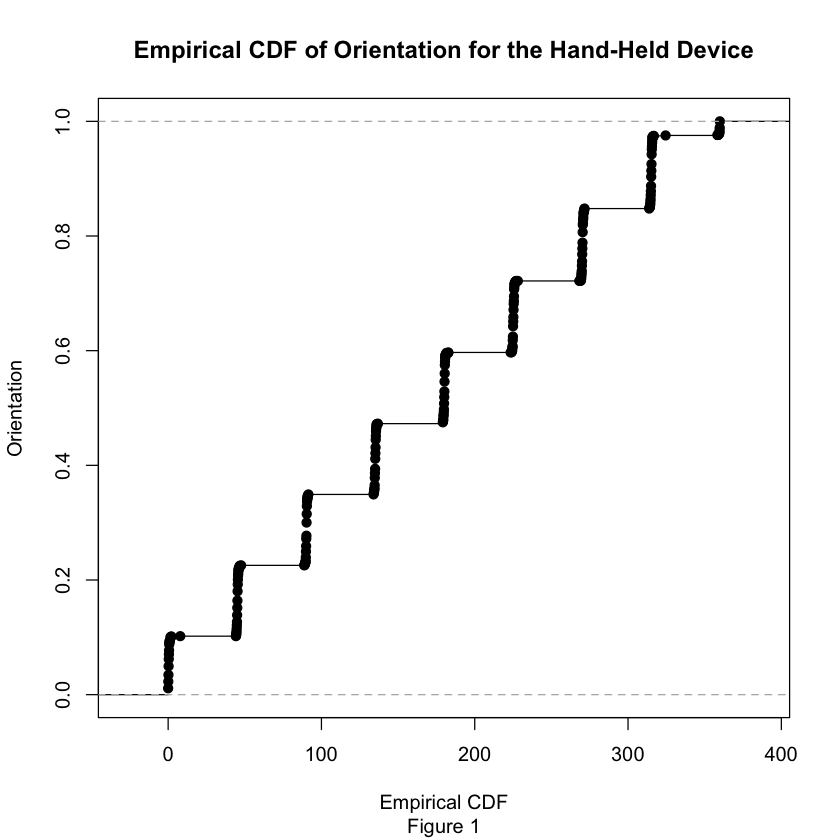

In [76]:
plot(ecdf(data$orientation), main = 'Empirical CDF of Orientation for the Hand-Held Device', sub = 'Figure 1',
        xlab = 'Empirical CDF', ylab = 'Orientation')

There are 8 basic orientations that are 45 degrees apart. The steps in the function showus that these orientations are not exactly 45 degrees apart.We can also see that the 0 orientation is split into the two groups, one near 0 and the other near 360.

We will use a funciton to round the angles.

In [77]:
## Function to round the angles of the orientation variable 
roundOrientation = function(angles) {
    refs = seq(0, by = 45, length  = 9)
    q = sapply(angles, function(o) which.min(abs(o - refs)))
    c(refs[1:8], 0)[q]
}

In [78]:
data$angle = roundOrientation(data$orientation)

Now, we keep *original* and augment our data frame with the new rounded angles. We can check that the results are correct with boxplots.

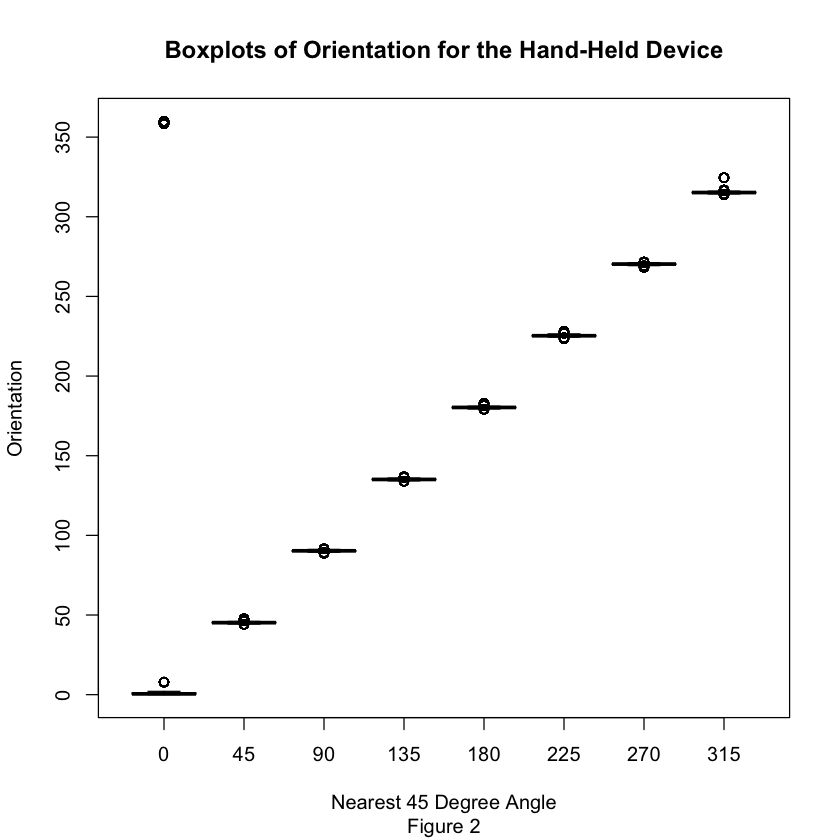

In [80]:
with(data, boxplot(orientation ~ angle, main = 'Boxplots of Orientation for the Hand-Held Device', 
                   xlab = "Nearest 45 Degree Angle", ylab = "Orientation", sub = 'Figure 2'))

The above figure displays the original orientation against the rounded value. Based on this, we can confirm that the values have mapped correctly. The “outliers” at the top left corner of the plot are the values near 360 that have been mapped to 0.

#### Exploring the MAC Addresses

Let's check the mapping of the MAC address of the access points and the channel. There should be a one-to-one mapping here. 

In [83]:
c(length(unique(data$mac)), length(unique(data$channel)))

[1] 12  8

There are 12 MAC addresses and 8 channels. Based on the floorplan there are only 6 access points. The documentation tells us that there are additional access points that are not part of the testing area that are not seen on the floorplan. Let’s check the counts of observations for the various MAC addresses.

In [84]:
table(data$mac)


00:04:0e:5c:23:fc 00:0f:a3:39:dd:cd 00:0f:a3:39:e0:4b 00:0f:a3:39:e1:c0 
              418            145619             43508            145862 
00:0f:a3:39:e2:10 00:14:bf:3b:c7:c6 00:14:bf:b1:97:81 00:14:bf:b1:97:8a 
            19162            126529            120339            132962 
00:14:bf:b1:97:8d 00:14:bf:b1:97:90 00:30:bd:f8:7f:c5 00:e0:63:82:8b:a9 
           121325            122315               301               103 